**Import Dataset**

In [101]:
import pandas as pd
import numpy as np
file="/content/drive/MyDrive/Housing Price.csv"
data=pd.read_csv(file)
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420.0,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960.0,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960.0,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,NaN,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,NaN,4,1,2,yes,yes,yes,no,yes,2,no,furnished


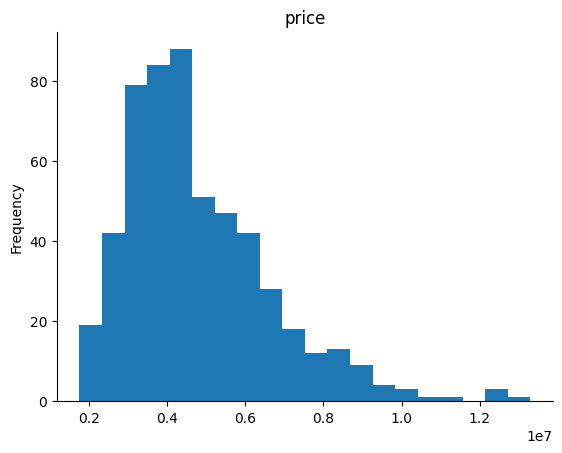

In [102]:
from matplotlib import pyplot as plt
data['price'].plot(kind='hist', bins=20, title='price')
plt.gca().spines[['top', 'right',]].set_visible(False)

**Preprocessing**

Copy the dataset for fusther work

In [103]:
data1=data.copy()
dataset=data.copy()

Do not need area for Housing prediction that's why remove this

In [104]:
dataset.drop('area', axis=1, inplace=True)

In [105]:
dataset.head()

,price,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [106]:
dataset.isnull().sum()

,0
price,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0
parking,0


In [107]:
dataset.nunique()

,0
price,219
bedrooms,6
bathrooms,4
stories,4
mainroad,2
guestroom,2
basement,2
hotwaterheating,2
airconditioning,2
parking,4


In [108]:
dataset.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
540,False
541,False
542,False
543,False


In [109]:
categorial_value=[]
for category in dataset:
  if dataset[category].dtype=='object':
    categorial_value.append(category)
print(categorial_value)

['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']


**Encoding thpse Categorical value**

In [110]:
from sklearn.preprocessing import LabelEncoder

In [111]:
labelincoder=LabelEncoder()
for column in categorial_value:

  dataset[column]=labelincoder.fit_transform(dataset[column])

In [112]:
dataset.head()

,price,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,4,2,3,1,0,0,0,1,2,1,0
1,12250000,4,4,4,1,0,0,0,1,3,0,0
2,12250000,3,2,2,1,0,1,0,0,2,1,1
3,12215000,4,2,2,1,0,1,0,1,3,1,0
4,11410000,4,1,2,1,1,1,0,1,2,0,0


**Normalization**

In [113]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [114]:
for col_name in dataset.columns:
    if dataset[col_name].nunique()>6:
        dataset[col_name]=scaler.fit_transform(dataset[[col_name]])


In [115]:
dataset.head()

,price,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,1.000000,4,2,3,1,0,0,0,1,2,1,0
1,0.909091,4,4,4,1,0,0,0,1,3,0,0
2,0.909091,3,2,2,1,0,1,0,0,2,1,1
3,0.906061,4,2,2,1,0,1,0,1,3,1,0
4,0.836364,4,1,2,1,1,1,0,1,2,0,0


Graph Plot

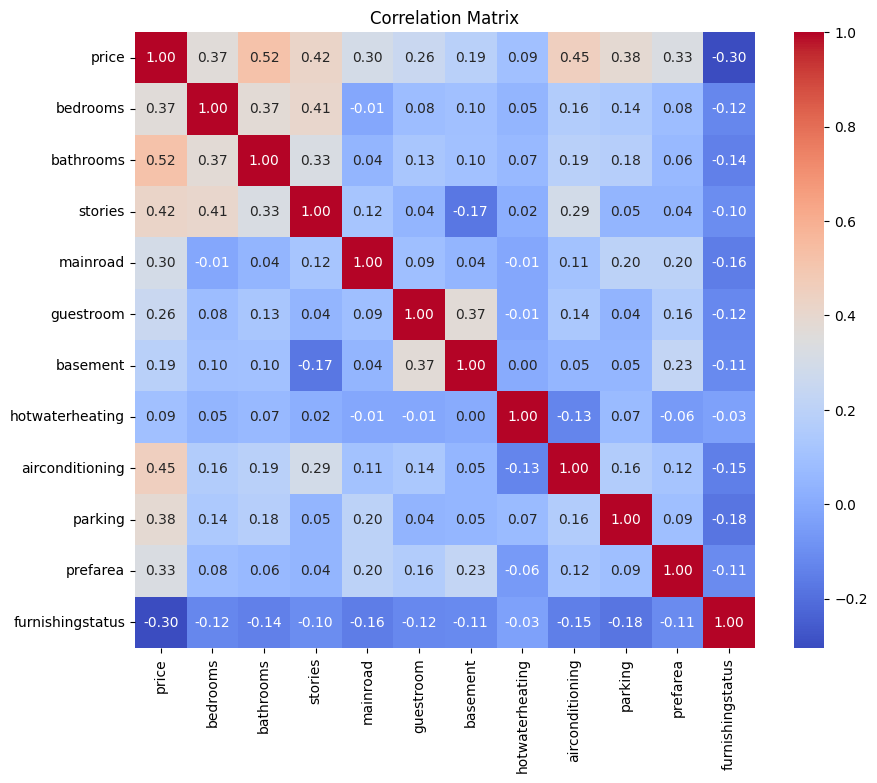

In [116]:
correlation_matrix = dataset.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

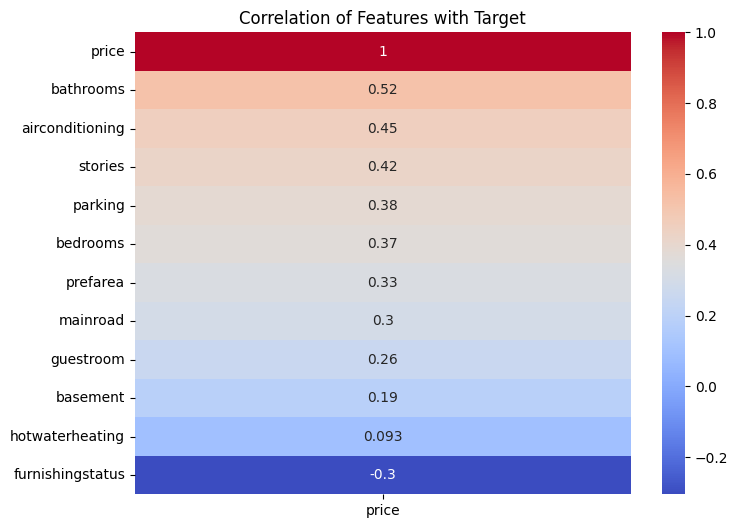

In [117]:
correlation_with_target=dataset.corr()['price']
correlation_with_target
correlation_matrix=dataset.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix[['price']].sort_values(by='price', ascending=False), annot=True, cmap='coolwarm')
plt.title('Correlation of Features with Target')
plt.show()

**Feature and Class selection**

In [118]:
x = dataset.drop('price',axis=1)
y = dataset['price']

In [119]:
x.shape

(545, 11)

In [120]:
y.shape


(545,)

**Train Test Split**

In [121]:
from sklearn.model_selection import train_test_split

In [122]:
from matplotlib import pyplot as plt
import seaborn as sns


In [123]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

**Model Selection**

In [124]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

In [125]:
models = {
    'RandomForestRegressor': RandomForestRegressor(n_estimators=100, random_state=0),
    'GradientBoostingRegressor': GradientBoostingRegressor(n_estimators=100, random_state=0),
    'LinearRegression': LinearRegression(),
    'SVR': SVR()
}

In [126]:
from sklearn.metrics import mean_squared_error
results = {}
for name, model in models.items():
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    mse = mean_squared_error(y_test, predictions)
    results[name] = mse
    print(f'{name} Mean Squared Error: {mse}')

RandomForestRegressor Mean Squared Error: 0.008953650125447653
GradientBoostingRegressor Mean Squared Error: 0.008967089368358437
LinearRegression Mean Squared Error: 0.008660480800528832
SVR Mean Squared Error: 0.009883414166754619


In [127]:
best_model_name = min(results, key=results.get)
print(f'Best Model: {best_model_name} with MSE: {results[best_model_name]}')

Best Model: LinearRegression with MSE: 0.008660480800528832


**Prediction**

In [128]:
best_model = models[best_model_name]
predictions = best_model.predict(x_test)

In [129]:
predictions

array([0.2194135 , 0.31910156, 0.26868263, 0.28286669, 0.09598992,
       0.44797896, 0.17134314, 0.13493793, 0.20557332, 0.51617408,
       0.40514432, 0.1874449 , 0.18179881, 0.21765405, 0.14885242,
       0.04647665, 0.16523193, 0.13095223, 0.12086952, 0.29008596,
       0.28822295, 0.35974294, 0.25211575, 0.14035234, 0.27396458,
       0.39998637, 0.29555527, 0.3293397 , 0.37002918, 0.34338149,
       0.14635395, 0.46289407, 0.43842787, 0.12280767, 0.21593579,
       0.29850828, 0.26230289, 0.18179881, 0.12136475, 0.23079572,
       0.49960721, 0.2399739 , 0.38857744, 0.12530614, 0.2541088 ,
       0.37917733, 0.25877862, 0.09083907, 0.21376741, 0.45257404,
       0.19586722, 0.36970482, 0.09732324, 0.11438535, 0.13937454,
       0.29476825, 0.40272361, 0.2124341 , 0.11438535, 0.15825253,
       0.21843571, 0.42050188, 0.17353823, 0.46763861, 0.10897094,
       0.33232181, 0.416831  , 0.06187837, 0.1723987 , 0.28310656,
       0.28811075, 0.48934768, 0.34338149, 0.36964695, 0.21048

In [130]:
actual_prices = y_test.tolist()
predicted_prices = predictions.tolist()

In [131]:
results_dataset = pd.DataFrame({'Actual Price': actual_prices, 'Predicted Price': predicted_prices})

**Graphical Representaion**

In [132]:
results_dataset.head()

,Actual Price,Predicted Price
0,0.245455,0.219414
1,0.375152,0.319102
2,0.195455,0.268683
3,0.448485,0.282867
4,0.103030,0.095990


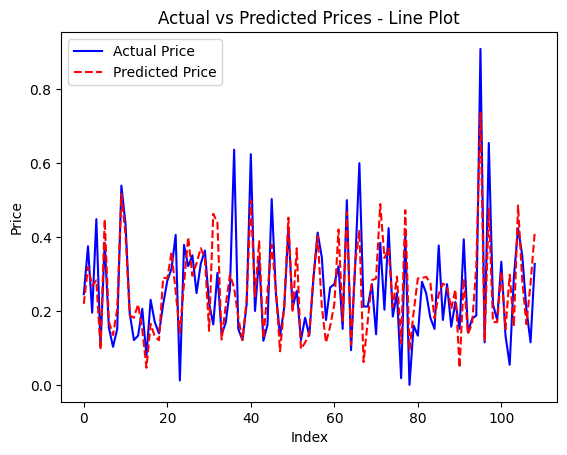

In [133]:
plt.plot(actual_prices, label='Actual Price', color='b')
plt.plot(predicted_prices, label='Predicted Price', color='r', linestyle='--')
plt.title('Actual vs Predicted Prices - Line Plot')
plt.xlabel('Index')
plt.ylabel('Price')
plt.legend()
plt.show()

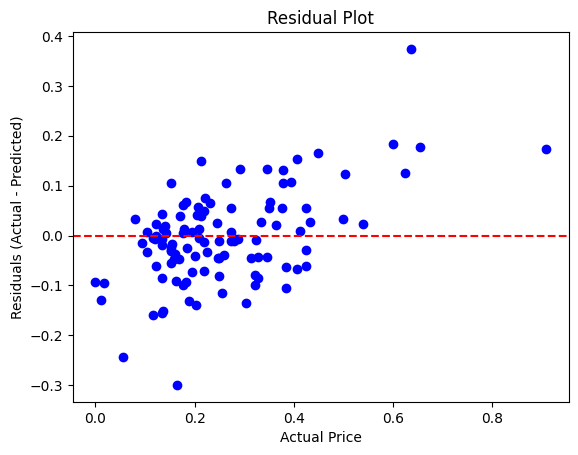

In [134]:
residuals = np.array(actual_prices) - np.array(predicted_prices)
plt.scatter(actual_prices, residuals, color='b')
plt.axhline(0, color='r', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Actual Price')
plt.ylabel('Residuals (Actual - Predicted)')
plt.show()


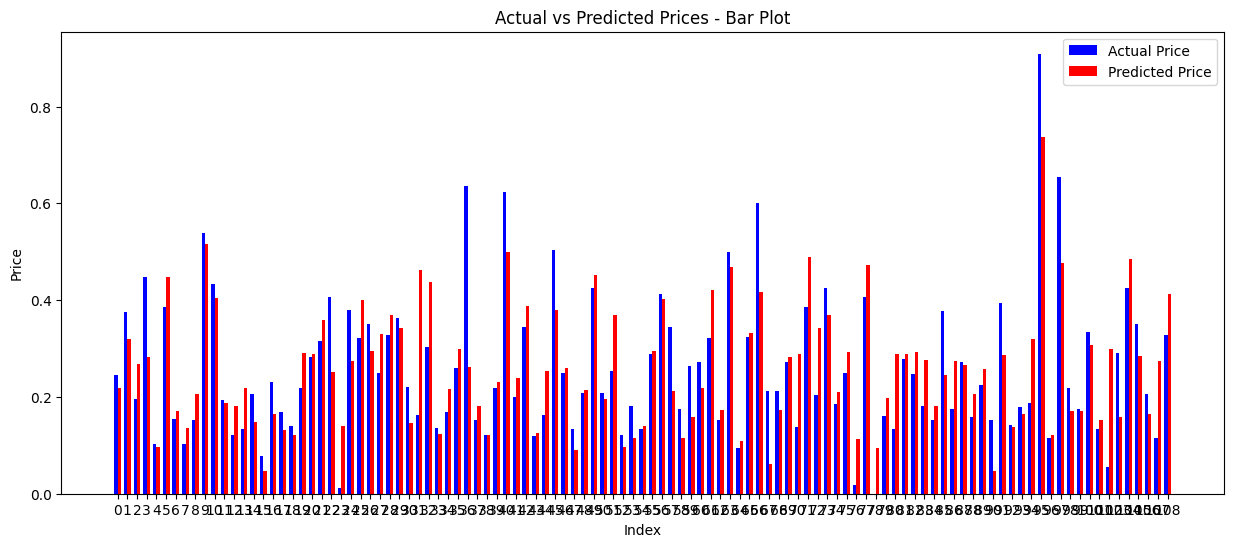

In [135]:
index = np.arange(len(actual_prices))
plt.figure(figsize=(15, 6))
bar_width = 0.35
plt.bar(index, actual_prices, bar_width, label='Actual Price', color='b')
plt.bar(index + bar_width, predicted_prices, bar_width, label='Predicted Price', color='r')
plt.title('Actual vs Predicted Prices - Bar Plot')
plt.xlabel('Index')
plt.ylabel('Price')
plt.xticks(index + bar_width / 2, index)
plt.legend()
plt.show()



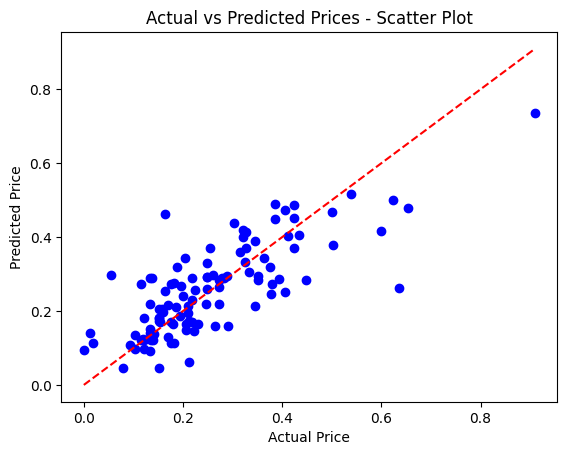

In [136]:
plt.scatter(actual_prices, predicted_prices, color='b')
plt.plot([min(actual_prices), max(actual_prices)], [min(actual_prices), max(actual_prices)], color='r', linestyle='--')
plt.title('Actual vs Predicted Prices - Scatter Plot')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()
